In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


In [3]:
df = pd.read_csv("S05-hw-dataset.csv")
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [5]:
df["default"].value_counts()
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

### Первичный анализ данных

Датасет содержит **3000 наблюдений** и **17 признаков**, включая целевую переменную `default`.
Все признаки являются числовыми (`int64` и `float64`), пропущенных значений в данных нет.

Целевая переменная `default` является бинарной.
Распределение классов следующее:
- класс `0` — около **59%** наблюдений;
- класс `1` — около **41%** наблюдений.

Таким образом, классы умеренно несбалансированы, что делает метрику **ROC-AUC**
более информативной, чем accuracy, для оценки качества моделей.


In [6]:
y = df["default"]
X = df.drop(columns=["default", "client_id"])

In [7]:
X.dtypes

age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((2400, 15), (600, 15))

### Разделение данных на обучающую и тестовую выборки

Данные были разделены на обучающую и тестовую выборки в пропорции **80/20**.
Для воспроизводимости результатов использован параметр `random_state=42`.

Параметр `stratify=y` обеспечивает сохранение пропорций классов целевой переменной
`default` в обеих выборках, что особенно важно при наличии дисбаланса классов.


In [9]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
roc_dummy = roc_auc_score(y_test, y_proba_dummy)

acc_dummy, roc_dummy

(0.59, 0.5)

### Бейзлайн модель

В качестве базовой модели использован `DummyClassifier` со стратегией
`most_frequent`, который всегда предсказывает наиболее частый класс.

Модель показала accuracy около **0.59**, что соответствует доле
наиболее частого класса в выборке.
Значение ROC-AUC равно **0.5**, что соответствует случайному угадыванию.

Данный результат используется как базовый уровень качества,
с которым далее сравнивается логистическая регрессия.


In [10]:
C_list = [0.01, 0.1, 1, 10, 100]
results = []
best = None

for C in C_list:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(max_iter=1000, C=C))
    ])
    model.fit(X_train, y_train)

    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)

    acc = accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    results.append({"C": C, "accuracy": acc, "roc_auc": auc})

    if best is None or auc > best["roc_auc"]:
        best = {"C": C, "accuracy": acc, "roc_auc": auc, "model": model}

pd.DataFrame(results)

,C,accuracy,roc_auc
0,0.01,0.806667,0.875442
1,0.10,0.801667,0.875477
2,1.00,0.800000,0.875614
3,10.00,0.800000,0.875637
4,100.00,0.801667,0.875649


### Анализ влияния параметра C

Для логистической регрессии был выполнен перебор параметра регуляризации `C`.
Во всех рассмотренных случаях модель показывает стабильные значения
ROC-AUC на уровне ~0.875–0.876.

Лучшее значение ROC-AUC достигается при `C = 100`, однако различия между
значениями `C` минимальны, что говорит о стабильности модели и отсутствии
сильного переобучения.

По сравнению с бейзлайн моделью (ROC-AUC = 0.5) логистическая регрессия
существенно улучшает качество предсказаний.


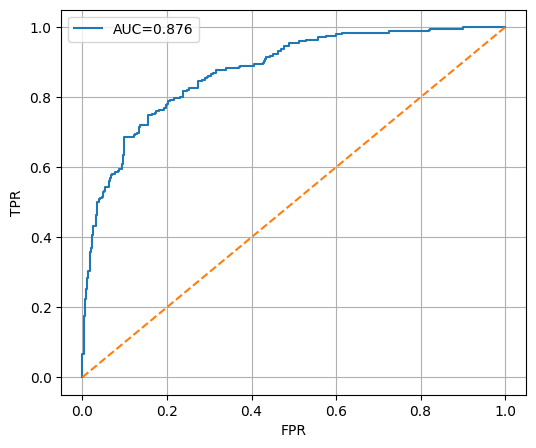

In [11]:
proba_best = best["model"].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, proba_best)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC={best['roc_auc']:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()

### ROC-кривая

ROC-кривая для лучшей модели логистической регрессии демонстрирует
хорошую способность модели различать классы.

Значение ROC-AUC составляет примерно **0.876**, что существенно выше
уровня случайного классификатора (0.5) и подтверждает высокое качество
модели.


In [14]:
import os
import matplotlib.pyplot as plt

os.makedirs("figures", exist_ok=True)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC={best['roc_auc']:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)

plt.savefig("figures/roc_curve.png", dpi=150, bbox_inches="tight")
plt.close()


### Таблица сравнения Dummy vs LogReg

In [16]:
summary = pd.DataFrame([
    {"model": "Dummy(most_frequent)", "accuracy": acc_dummy, "roc_auc": roc_dummy},
    {"model": f"LogReg(C={best['C']})", "accuracy": accuracy_score(y_test, (proba_best >= 0.5).astype(int)), "roc_auc": roc_auc_score(y_test, proba_best)},
])
summary


,model,accuracy,roc_auc
0,Dummy(most_frequent),0.590000,0.500000
1,LogReg(C=100),0.801667,0.875649


### Выводы

В ходе работы была решена задача бинарной классификации для предсказания
целевой переменной `default` на основе клиентских признаков.
Бейзлайн модель `DummyClassifier` показала accuracy около **0.59** и ROC-AUC = **0.5**,
что соответствует предсказанию наиболее частого класса и случайному качеству по ROC-AUC.
Логистическая регрессия с использованием стандартизации признаков
существенно улучшила качество модели: ROC-AUC вырос до примерно **0.876**, а accuracy — до **0.80**.
Перебор параметра регуляризации `C` показал стабильность качества модели,
при этом наилучшее значение ROC-AUC достигается при `C = 100`, хотя различия между значениями `C` минимальны.
Построенная ROC-кривая подтверждает хорошую способность модели различать классы.
